# 1. Import Libraries

In [5]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import eda_helper_functions

from sklearn.ensemble import IsolationForest

# 2. Read the Training Data

In [6]:
file_path = r"C:\Users\Asus\OneDrive\Desktop\flight sagemaker-project\data\train.csv"

train = pd.read_csv(file_path)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-03-27,Delhi,Cochin,20:50:00,04:25:00,455,1.0,No Info,12242
1,Multiple Carriers,2019-06-03,Delhi,Cochin,10:35:00,19:15:00,520,1.0,No Info,7354
2,Indigo,2019-05-18,Delhi,Cochin,08:35:00,16:10:00,455,1.0,No Info,6442
3,Multiple Carriers,2019-06-03,Delhi,Cochin,10:00:00,21:00:00,660,1.0,No Info,13587
4,Jet Airways,2019-06-15,Delhi,Cochin,22:50:00,19:00:00,1210,1.0,In-flight meal not included,10262
...,...,...,...,...,...,...,...,...,...,...
635,Jet Airways,2019-06-15,Delhi,Cochin,19:45:00,12:35:00,1010,1.0,In-flight meal not included,10262
636,Indigo,2019-05-21,Kolkata,Banglore,15:30:00,18:05:00,155,0.0,No Info,4804
637,Multiple Carriers,2019-05-21,Delhi,Cochin,18:00:00,01:30:00,450,1.0,No Info,7888
638,Multiple Carriers,2019-03-06,Delhi,Cochin,07:30:00,21:00:00,810,1.0,No Info,15147


In [107]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [3]:
train=train.assign(**{
    col:pd.to_datetime(train.loc[:,col],dayfirst=True,format='mixed')
    for col in ['date_of_journey','dep_time','arrival_time']
})

In [113]:
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-03-27,Delhi,Cochin,2025-04-14 20:50:00,2025-04-14 04:25:00,455,1.0,No Info,12242
1,Multiple Carriers,2019-06-03,Delhi,Cochin,2025-04-14 10:35:00,2025-04-14 19:15:00,520,1.0,No Info,7354
2,Indigo,2019-05-18,Delhi,Cochin,2025-04-14 08:35:00,2025-04-14 16:10:00,455,1.0,No Info,6442
3,Multiple Carriers,2019-06-03,Delhi,Cochin,2025-04-14 10:00:00,2025-04-14 21:00:00,660,1.0,No Info,13587
4,Jet Airways,2019-06-15,Delhi,Cochin,2025-04-14 22:50:00,2025-04-14 19:00:00,1210,1.0,In-flight meal not included,10262
...,...,...,...,...,...,...,...,...,...,...
635,Jet Airways,2019-06-15,Delhi,Cochin,2025-04-14 19:45:00,2025-04-14 12:35:00,1010,1.0,In-flight meal not included,10262
636,Indigo,2019-05-21,Kolkata,Banglore,2025-04-14 15:30:00,2025-04-14 18:05:00,155,0.0,No Info,4804
637,Multiple Carriers,2019-05-21,Delhi,Cochin,2025-04-14 18:00:00,2025-04-14 01:30:00,450,1.0,No Info,7888
638,Multiple Carriers,2019-03-06,Delhi,Cochin,2025-04-14 07:30:00,2025-04-14 21:00:00,810,1.0,No Info,15147


# 3. High-level Summary of Data

In [114]:
trian.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    object        
 1   date_of_journey  640 non-null    datetime64[ns]
 2   source           640 non-null    object        
 3   destination      640 non-null    object        
 4   dep_time         640 non-null    datetime64[ns]
 5   arrival_time     640 non-null    datetime64[ns]
 6   duration         640 non-null    int64         
 7   total_stops      640 non-null    float64       
 8   additional_info  640 non-null    object        
 9   price            640 non-null    int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 50.1+ KB


In [14]:
train.describe(include='number')

,duration,total_stops,price
count,640.000000,640.000000,640.000000
mean,621.984375,0.801562,8977.001562
std,499.369994,0.664078,4810.411135
min,75.000000,0.000000,1965.000000
25%,170.000000,0.000000,5188.000000
50%,480.000000,1.000000,8182.000000
75%,901.250000,1.000000,12390.500000
max,2345.000000,3.000000,52229.000000


In [15]:
train.describe(include='O')

,airline,date_of_journey,source,destination,dep_time,arrival_time,additional_info
count,640,640,640,640,640,640,640
unique,8,40,5,6,165,149,4
top,Jet Airways,2019-05-09,Delhi,Cochin,17:00:00,19:00:00,No Info
freq,228,40,264,264,18,37,488


In [16]:
(
   train
    .assign(total_stops=train['total_stops'].astype(object))
    .describe(include='O')
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,total_stops,additional_info
count,640,640,640,640,640,640,640.0,640
unique,8,40,5,6,165,149,4.0,4
top,Jet Airways,2019-05-09,Delhi,Cochin,17:00:00,19:00:00,1.0,No Info
freq,228,40,264,264,18,37,348.0,488



 # 4. High-level analysis of Missing Values

In [17]:
eda_helper_functions.missing_info(train)

,count,percentage
variable,,


 # 5. High-level analysis of Outliers

In [18]:
forest = IsolationForest(n_estimators=10, random_state=42)

In [22]:
(
	train
	.assign(outlier=forest.fit_predict(
		train
		.drop(columns="price")
		.select_dtypes(include="number")
	))
	.query("outlier == -1")
	# .duration
	# .describe()
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
4,Jet Airways,2019-06-15,Delhi,Cochin,22:50:00,19:00:00,1210,1.0,In-flight meal not included,10262,-1
5,Indigo,2019-05-12,Chennai,Kolkata,11:35:00,14:00:00,145,0.0,No Info,4332,-1
6,Spicejet,2019-06-03,Mumbai,Hyderabad,13:15:00,14:45:00,90,0.0,No check-in baggage included,1965,-1
7,Indigo,2019-06-21,Mumbai,Hyderabad,16:55:00,18:25:00,90,0.0,No Info,4392,-1
9,Jet Airways,2019-06-01,Delhi,Cochin,09:00:00,12:35:00,1655,1.0,In-flight meal not included,10262,-1
...,...,...,...,...,...,...,...,...,...,...,...
627,Jet Airways,2019-03-21,Delhi,Cochin,06:20:00,04:25:00,1325,2.0,No Info,11538,-1
628,Indigo,2019-06-24,Delhi,Cochin,05:35:00,08:50:00,195,0.0,No Info,5000,-1
630,Jet Airways,2019-05-18,Kolkata,Banglore,20:25:00,19:10:00,1365,1.0,No Info,14151,-1
631,Jet Airways,2019-05-06,Kolkata,Banglore,09:35:00,09:45:00,1450,1.0,In-flight meal not included,8066,-1


# 6. Pair Plots

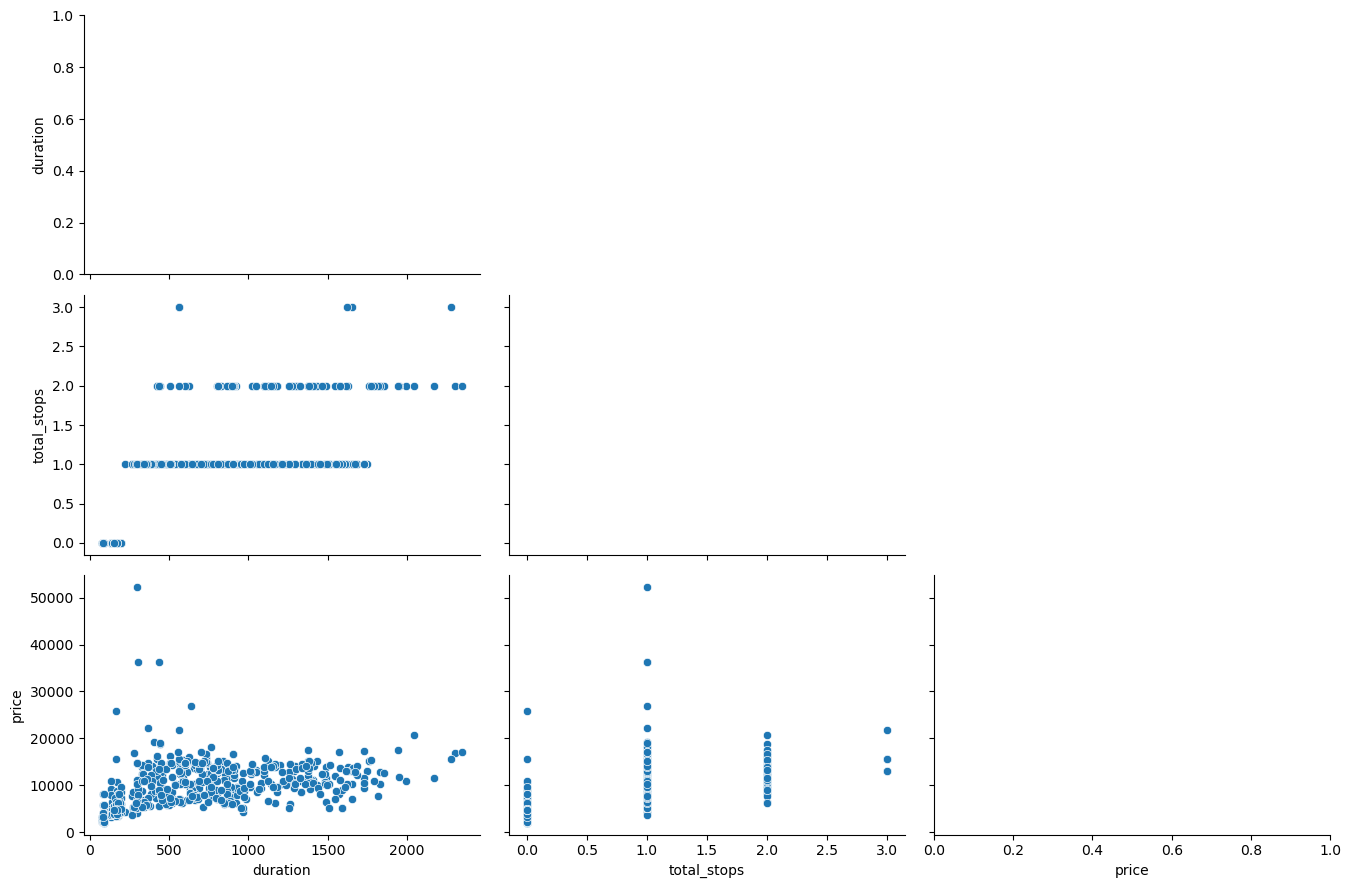

In [20]:
eda_helper_functions.pair_plots(train)

# 7. Correlation Analysis

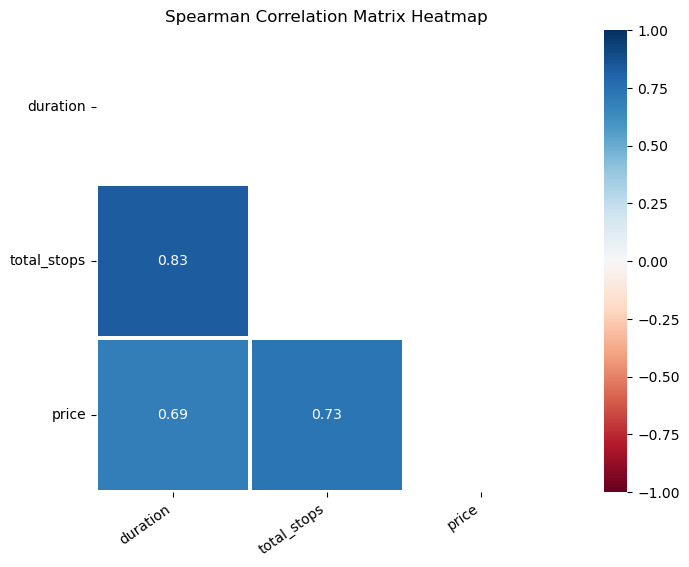

In [33]:
eda_helper_functions.correlation_heatmap(train)

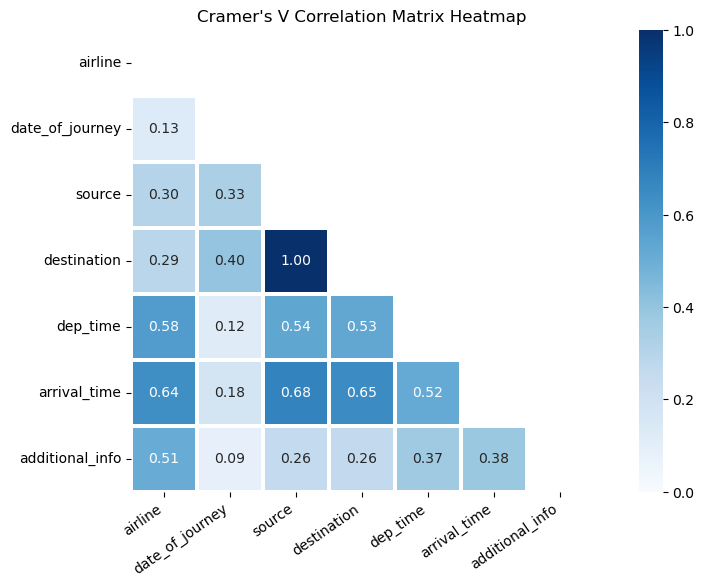

In [52]:
eda_helper_functions.cramersV_heatmap(train)

# 8. Detailed Analysis

In [50]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

# 8.1 airline

In [51]:
train.airline

0            Jet Airways
1      Multiple Carriers
2                 Indigo
3      Multiple Carriers
4            Jet Airways
             ...        
635          Jet Airways
636               Indigo
637    Multiple Carriers
638    Multiple Carriers
639    Multiple Carriers
Name: airline, Length: 640, dtype: object

In [53]:
eda_helper_functions.cat_summary(train, "airline")

0            Jet Airways
1      Multiple Carriers
2                 Indigo
3      Multiple Carriers
4            Jet Airways
             ...        
635          Jet Airways
636               Indigo
637    Multiple Carriers
638    Multiple Carriers
639    Multiple Carriers
Name: airline, Length: 640, dtype: object

Data Type      : object
Cardinality    : 8 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,
count,640
unique,8
top,Jet Airways
freq,228


,count,percentage
category,,
Jet Airways,228,0.356250
Indigo,113,0.176563
Air India,109,0.170313
Multiple Carriers,78,0.121875
Spicejet,54,0.084375
Vistara,31,0.048438
Air Asia,23,0.035937
Goair,4,0.006250


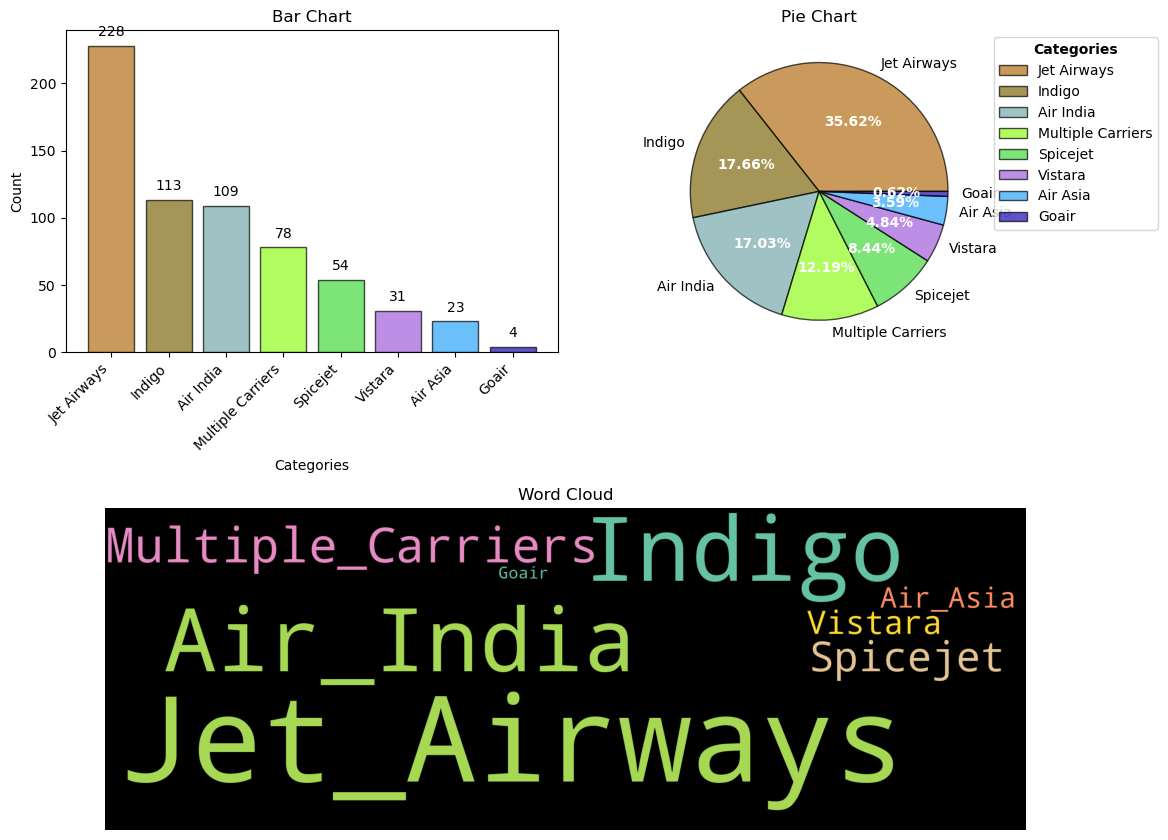

In [54]:
eda_helper_functions.cat_univar_plots(train, "airline")

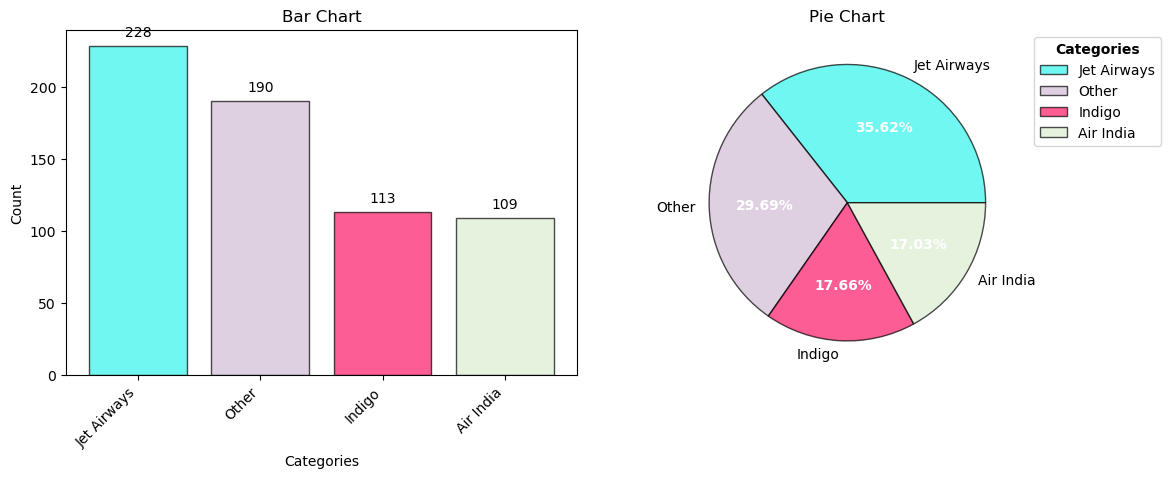

In [55]:
eda_helper_functions.cat_univar_plots(train, "airline", show_wordcloud=False, k=3)

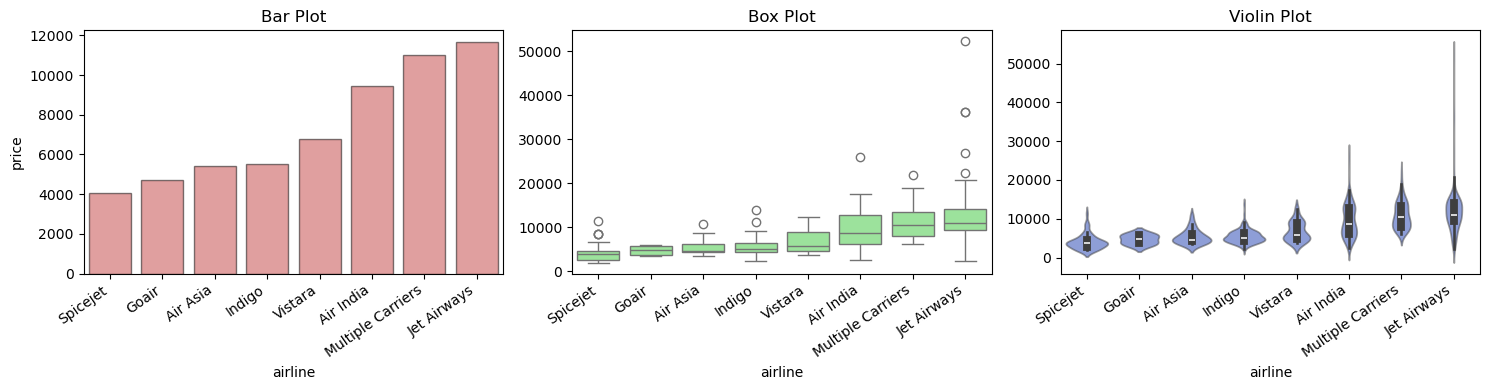

In [60]:
eda_helper_functions.num_cat_bivar_plots(trian,num_var='price',cat_var='airline',k=None)

In [61]:
eda_helper_functions.num_cat_hyp_testing(train, "price", "airline")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 48.582099926428945
- p-value              : 3.2599182832482854e-55
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 294.37527115480657
- p-value              : 9.609768839794497e-60
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


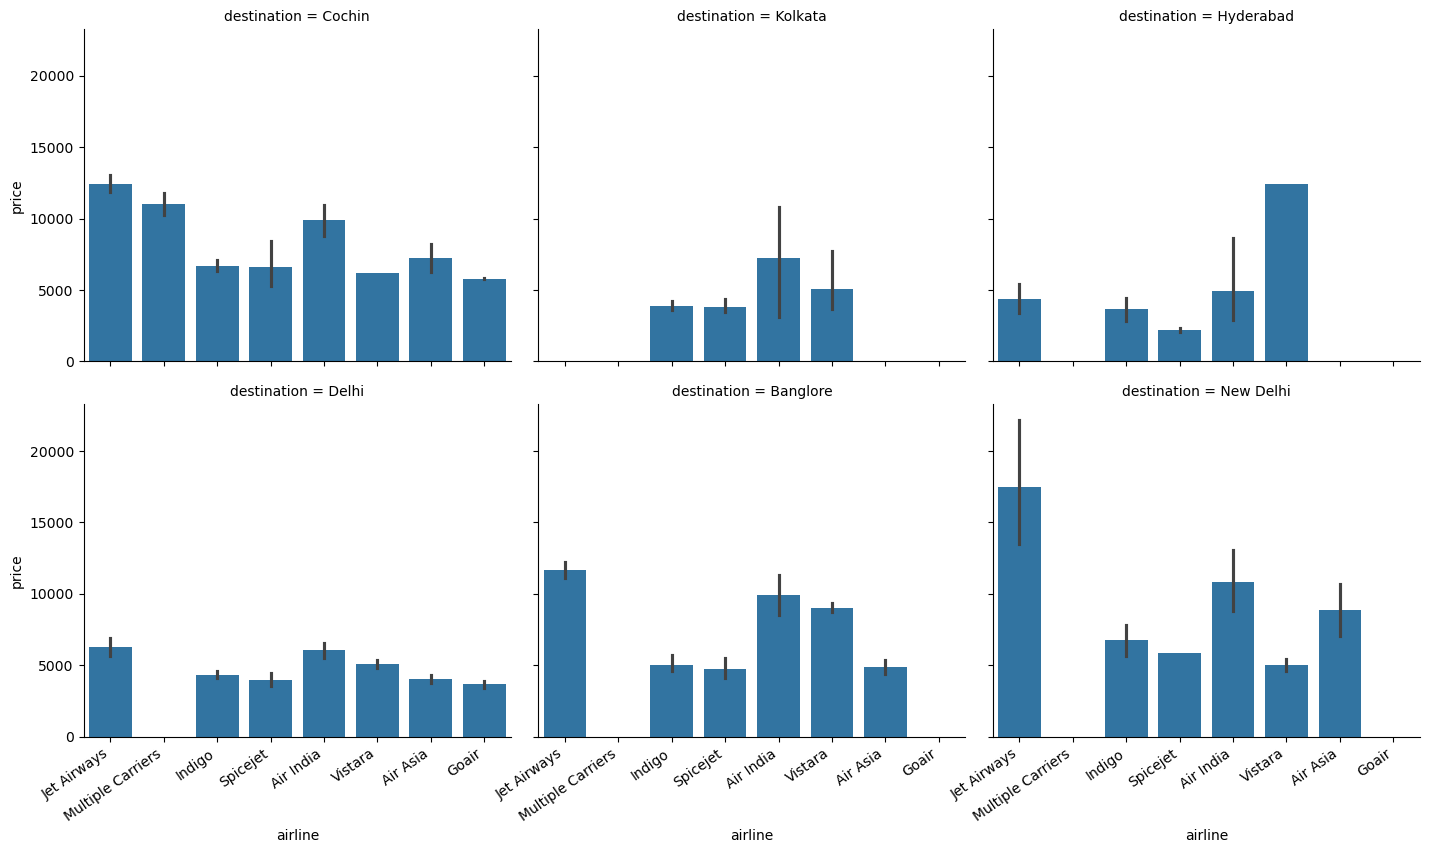

In [87]:
airline_grid=sns.FacetGrid(data=train,col='destination',col_wrap=3,
	height=4,
	aspect=1.2,
	sharey=True)
airline_grid.map(sns.barplot,"airline", "price",order=train.airline.unique())
for ax in airline_grid.axes[3:]:
    eda_helper_functions.rotate_xlabels(ax)

# 8.2 date_of_journey

In [88]:
train.date_of_journey

0      2019-03-27
1      2019-06-03
2      2019-05-18
3      2019-06-03
4      2019-06-15
          ...    
635    2019-06-15
636    2019-05-21
637    2019-05-21
638    2019-03-06
639    2019-06-03
Name: date_of_journey, Length: 640, dtype: object

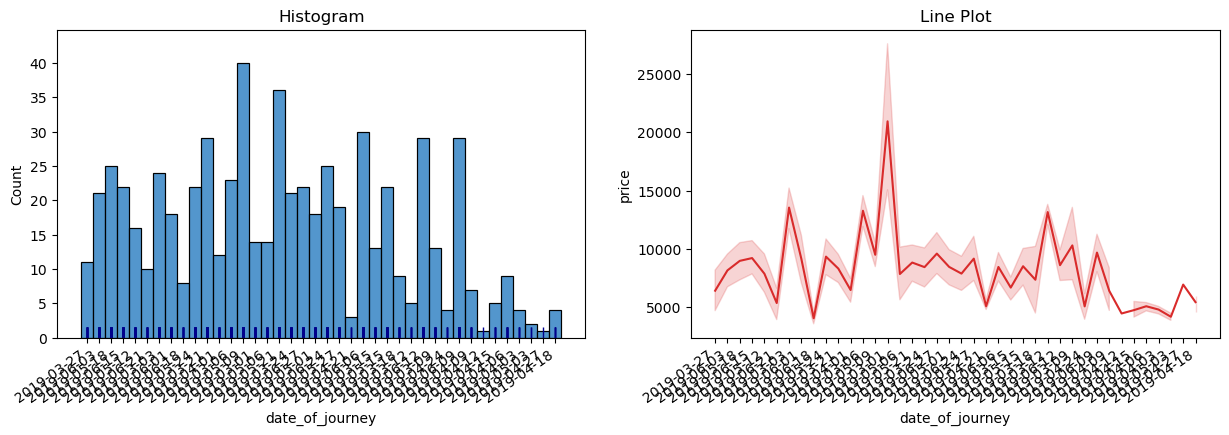

In [93]:
eda_helper_functions.dt_univar_plots(data=train,
                                     var='date_of_journey',target='price',bins='auto')

In [120]:
train['date_of_journey'].dt.strftime('%B').unique()

array(['March', 'June', 'May', 'April'], dtype=object)

In [115]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          640 non-null    object        
 1   date_of_journey  640 non-null    datetime64[ns]
 2   source           640 non-null    object        
 3   destination      640 non-null    object        
 4   dep_time         640 non-null    datetime64[ns]
 5   arrival_time     640 non-null    datetime64[ns]
 6   duration         640 non-null    int64         
 7   total_stops      640 non-null    float64       
 8   additional_info  640 non-null    object        
 9   price            640 non-null    int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 50.1+ KB


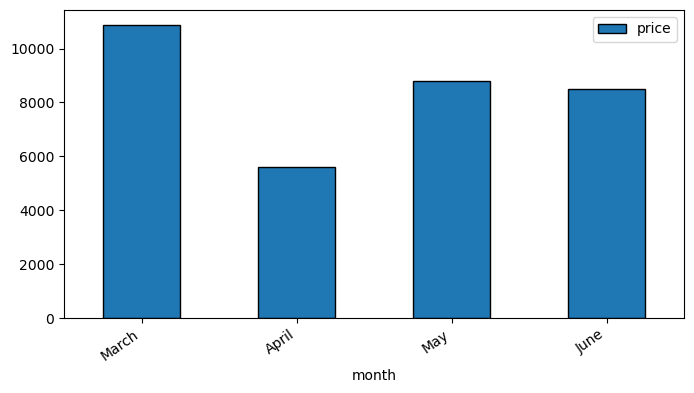

In [145]:
(
	train
	.groupby(pd.Grouper(key="date_of_journey", freq="M"))
	.price.mean()
	.to_frame()
	.set_axis(["March", "April", "May", "June"], axis=0)
	.rename_axis(index="month")
	.plot(
		kind="bar",
		figsize=(8, 4),
		edgecolor="black"
	)
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

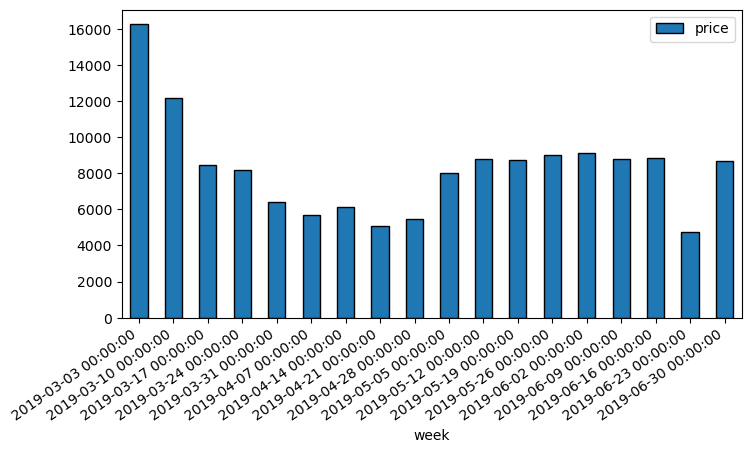

In [146]:
(
	train
	.groupby(pd.Grouper(key="date_of_journey", freq="W"))
	.price.mean()
	.to_frame()
	.rename_axis(index="week")
	.plot(
		kind="bar",
		figsize=(8, 4),
		edgecolor="black"
	)
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

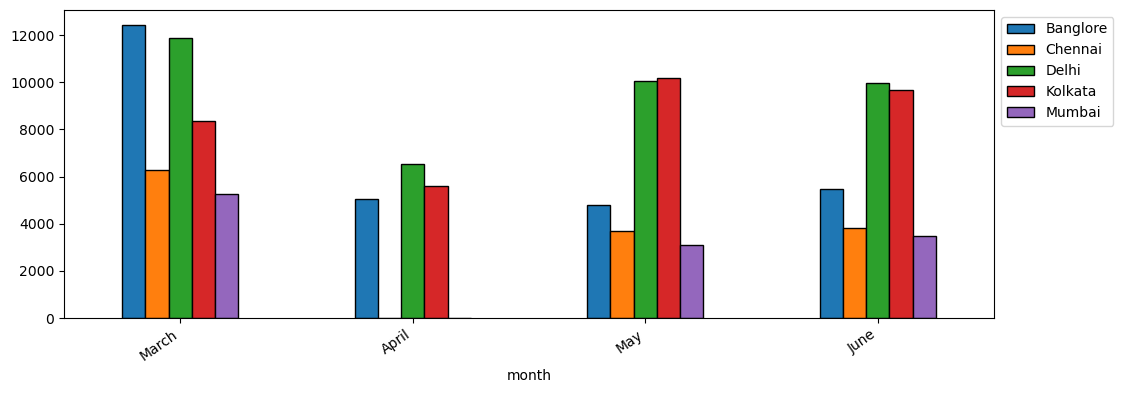

In [159]:
(
     train
     .groupby([pd.Grouper(key='date_of_journey',freq="M"),"source"])
     .price.mean()
     .unstack()
     .set_axis(["March", "April", "May", "June"], axis=0)
     .rename_axis(index="month")
     .plot(
         kind="bar",
		figsize=(12, 4),
		edgecolor="black"
     )
    
)

ax=plt.gca()
ax.legend(
	loc="upper left",
	bbox_to_anchor=(1, 1)
)
eda_helper_functions.rotate_xlabels(ax)

# 8.3 dep_time

In [160]:
train.dep_time

0     2025-04-14 20:50:00
1     2025-04-14 10:35:00
2     2025-04-14 08:35:00
3     2025-04-14 10:00:00
4     2025-04-14 22:50:00
              ...        
635   2025-04-14 19:45:00
636   2025-04-14 15:30:00
637   2025-04-14 18:00:00
638   2025-04-14 07:30:00
639   2025-04-14 08:30:00
Name: dep_time, Length: 640, dtype: datetime64[ns]

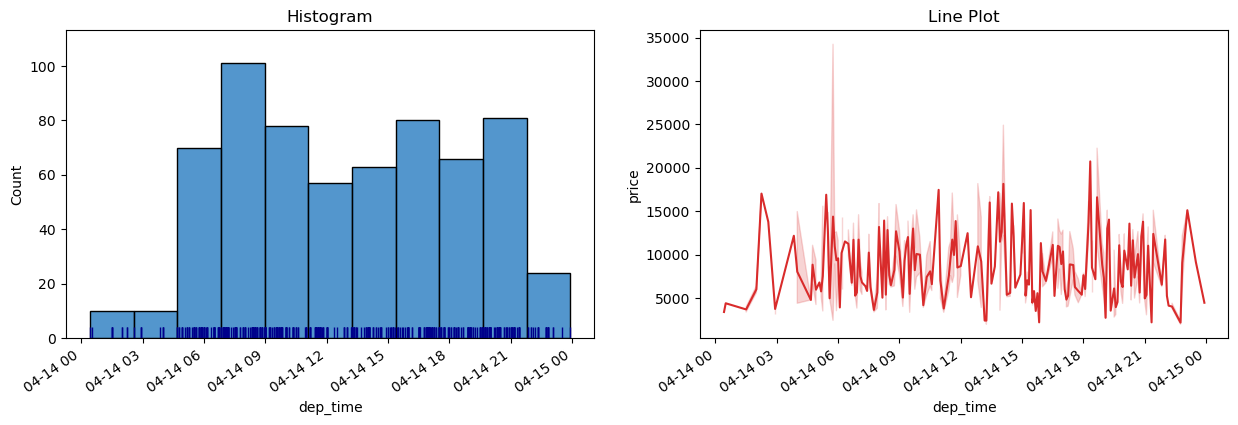

In [161]:
eda_helper_functions.dt_univar_plots(train, "dep_time", "price")

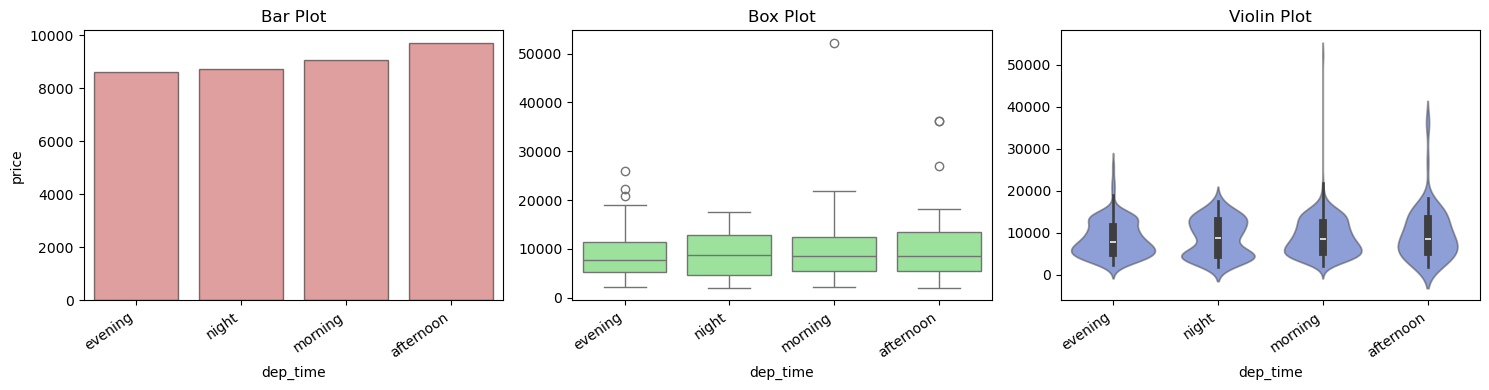

In [162]:
(
	train
	.assign(dep_time=lambda df_: (
		np.select([df_.dep_time.dt.hour.between(4, 12, inclusive="left"),
				   df_.dep_time.dt.hour.between(12, 16, inclusive="left"),
				   df_.dep_time.dt.hour.between(16, 20, inclusive="left")],
				  ["morning", "afternoon", "evening"],
				  default="night")
	))
	.pipe(eda_helper_functions.num_cat_bivar_plots, "price", "dep_time")
)

# 8.4 duration

In [4]:
train.duration

0       455
1       520
2       455
3       660
4      1210
       ... 
635    1010
636     155
637     450
638     810
639     645
Name: duration, Length: 640, dtype: int64

In [5]:
eda_helper_functions.num_summary(train, "duration")

0       455
1       520
2       455
3       660
4      1210
       ... 
635    1010
636     155
637     450
638     810
639     645
Name: duration, Length: 640, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 640 / 640 rows


,value
percentile,
0,75.00
5,90.00
10,140.00
25,170.00
50,480.00
75,901.25
90,1396.50
95,1610.25
99,1946.10


,value
mean,621.984375
trimmed mean (5%),585.164931
trimmed mean (10%),556.210938
median,480.000000


,value
var,249370.390992
std,499.369994
IQR,731.250000
mad,315.000000
coef_variance,0.802866


,value
skewness,0.955031
kurtosis,0.093287


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 1.6414450634834193e-21
Test Statistic       : 0.883684870671887
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.782
Test Statistic       : 24.034930742541974
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


In [6]:
train.duration.quantile([0.25, 0.5, 0.75])

0.25    170.00
0.50    480.00
0.75    901.25
Name: duration, dtype: float64

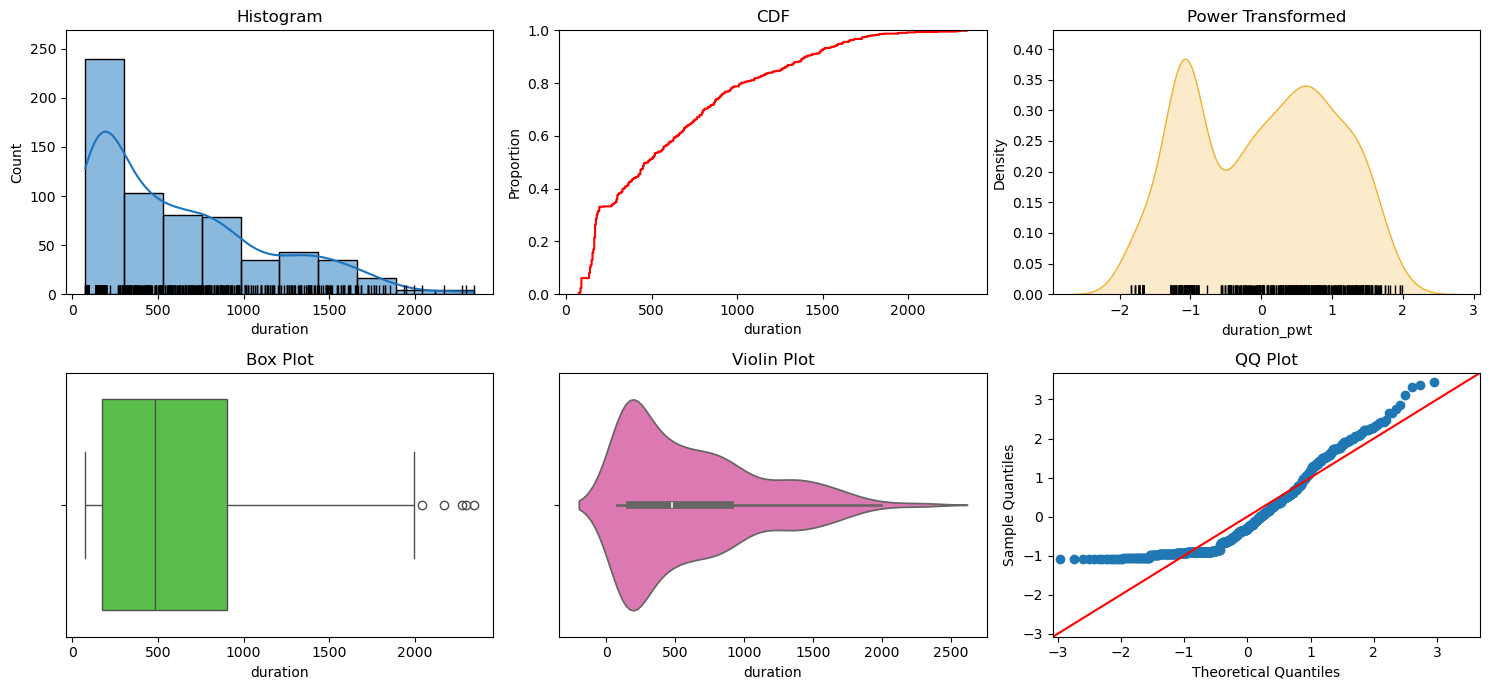

In [7]:
eda_helper_functions.num_univar_plots(train, "duration")

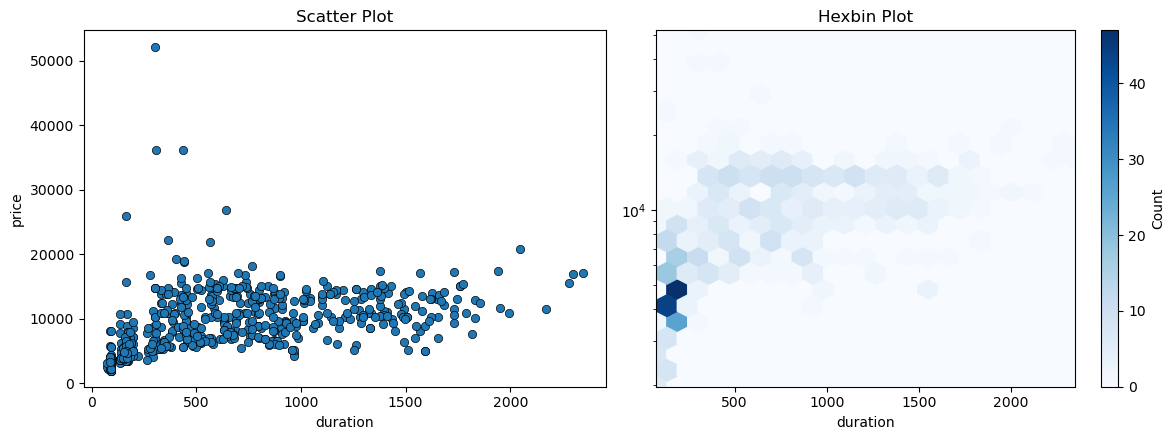

In [8]:
eda_helper_functions.num_bivar_plots(
	train,
	"duration",
	"price",
	hexbin_kwargs=dict(
		yscale="log",
		gridsize=20,
		cmap="Blues"
	)
)

In [9]:
eda_helper_functions.num_num_hyp_testing(train, "price", "duration")                             

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.4727569897712519
- p-value              : 5.993336247751016e-37
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.691194033867281
- p-value              : 4.596849025906544e-92
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


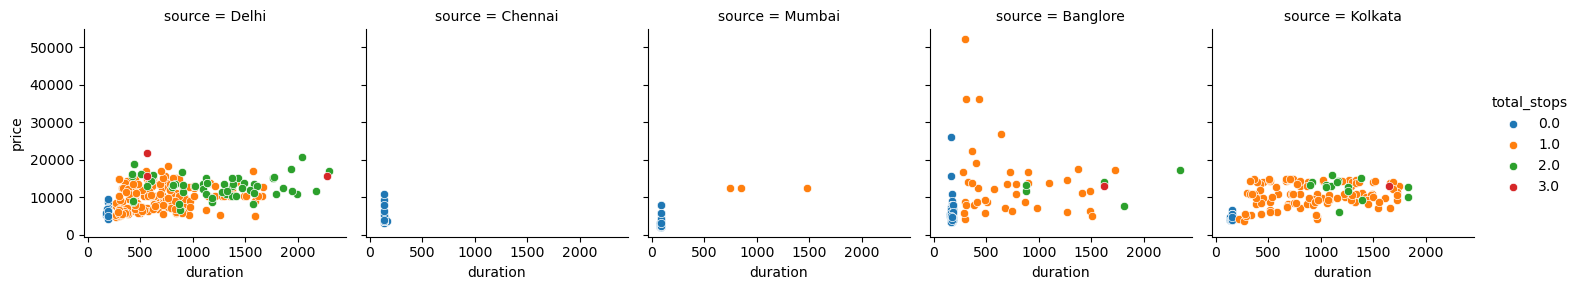

In [10]:
duration_grid = sns.FacetGrid(
	data=train,
	col="source",
	hue="total_stops",
	sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

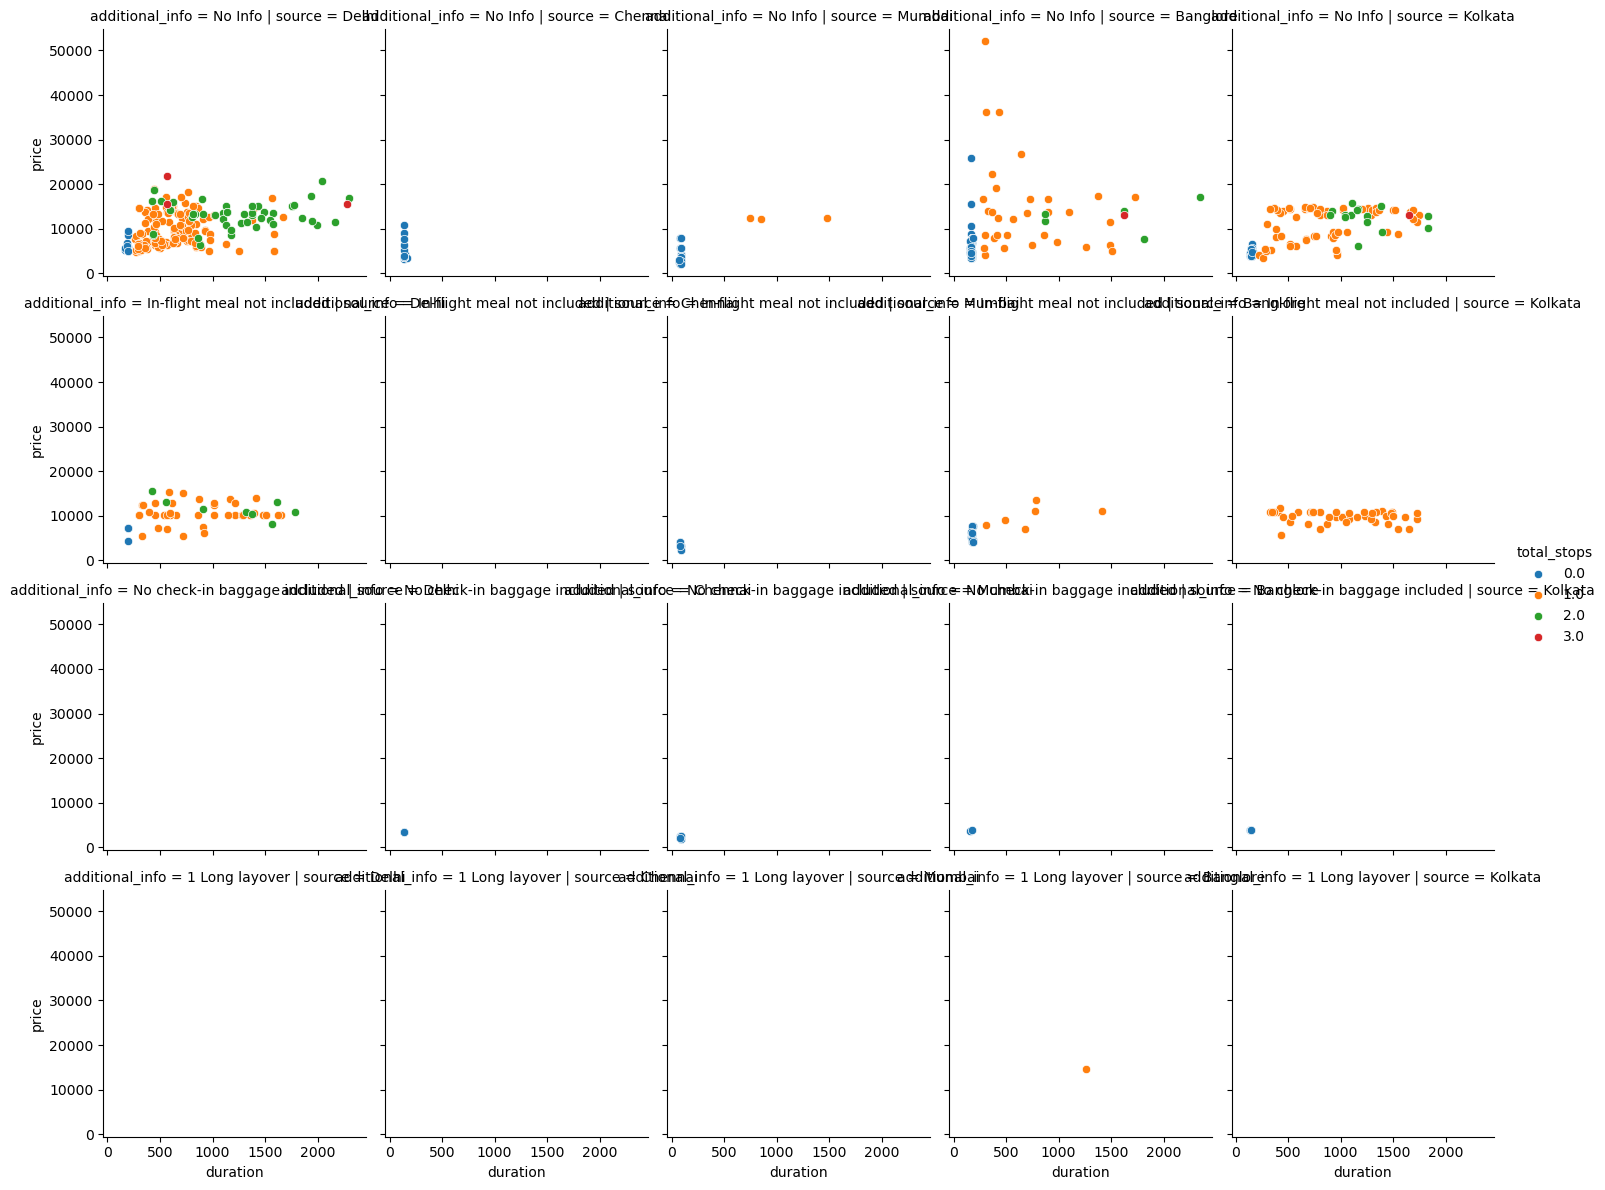

In [11]:
duration_grid = sns.FacetGrid(
	data=train,
	col="source",
	row="additional_info",
	hue="total_stops",
	sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()